### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 1

Provide answers to the problems in the boxes provided.  Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.  Find an environment that allows you to work with it.  You can either
install `jupyter` as a python packag on your own laptop or PC.  Or you can use a suitable website
on the internet, such as [nbviewer](https://nbviewer.jupyter.org/github/cs4423) and `binder`.

The following packages need to be loaded.  In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

In [1]:
#James O'Rourke
#15334121

#set up by importing the modules
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import collections 

##  1. Warmup.

The purpose of this task is to get you used to working with the `networkx` package
in the `jupyter` notebook environment.

1. Define a new (simple) graph `G` on the vertex set $X = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
with edges $0-1$, $1-2$, $2-3$, $3-4$, $4-5$, $5-6$, $6-7$, $7-8$, $8-9$, and $9-0$.
Draw the graph.  Hence or otherwise determine its **order** (the number of nodes)
and its **size** (the number of links).

The number of nodes in Graph G is 10
The number of edges in Graph G is 10


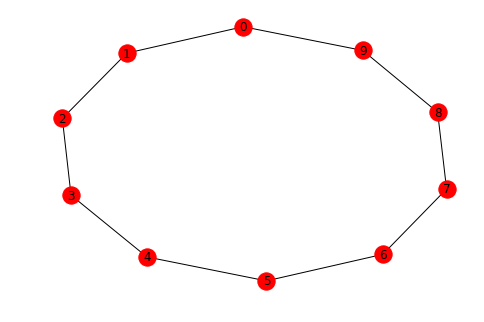

In [2]:
#Creating the graphs and adding vertex,edges
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
G.add_edges_from([(0,1), (1,2),(2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,0)])

#drawing the graph
nx.draw(G, with_labels=True)

print("The number of nodes in Graph G is",G.order())
print("The number of edges in Graph G is",G.size())

2. Find the **adjacency matrix** `A` of the graph `G`.  Then compute its square, $A^2$,
and draw the graph `G2` that has $A^2$ as its adjacency matrix.  What are the connected components of `G2`? 

The adjaceny matrix of G

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]] 

The squared adjacency matrix of G

[[2 0 1 0 0 0 0 0 1 0]
 [0 2 0 1 0 0 0 0 0 1]
 [1 0 2 0 1 0 0 0 0 0]
 [0 1 0 2 0 1 0 0 0 0]
 [0 0 1 0 2 0 1 0 0 0]
 [0 0 0 1 0 2 0 1 0 0]
 [0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 1 0 2 0 1]
 [1 0 0 0 0 0 1 0 2 0]
 [0 1 0 0 0 0 0 1 0 2]]
There are  2 connected componenets in G2


[{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]

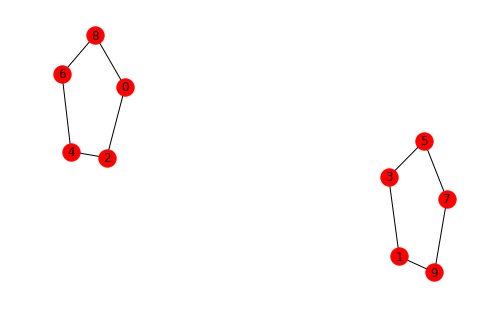

In [3]:
#Adjacency matrix


A = nx.adjacency_matrix(G)
print("The adjaceny matrix of G\n")
print(A.todense(),"\n")

print("The squared adjacency matrix of G\n")
A_squared = A**2
print(A_squared.todense())

G2 = nx.from_scipy_sparse_matrix(A_squared)
nx.draw(G2, with_labels =True)

print("There are ",nx.number_connected_components(G2),"connected componenets in G2")
sorted(nx.connected_components(G2))

##  2.  Projections

For the affilliation network below, with six people labelled $A$ to $F$,
and three foci labelled $X$, $Y$ and $Z$, draw the projection on (just)
the people, in which two people are joined by an edge if they have a common
focus.

<img src="bip.png">

(Of course, one can do this easily by hand.  It would be nice to get
`networkx` to do it for you.)

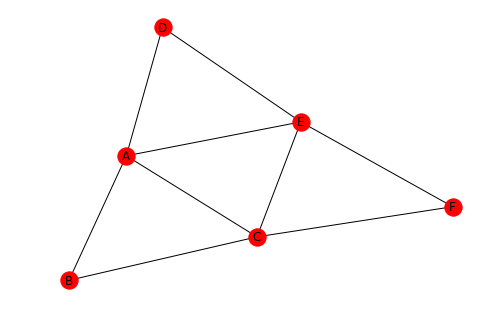

In [4]:
x = ("ABCDEFXYZ")
edges = ["ZF","ZE","ZC",
        "YE","YD","YA",
        "XC","XB","XA"]


G = nx.Graph()
G.add_nodes_from(x)
G.add_edges_from(edges)


PG = nx.projected_graph(G,("ABCDEF"))

nx.draw(PG, with_labels=True)

## 3. A Collaborations Network

The **social graph** of a node $x$ in a (social) network
is the **induced subgraph** on the set of friends of $x$
(that is the graph which has (only) the friends of $x$
as its vertices, and between them all the edges from the
original network).
The **clustering coefficient** of $x$ is the density
$m / \binom{n}{2}$
of the social graph of $x$, the proportion its number of edges,
$m$, and its potential number of edges, $\binom{n}{2} = \frac12 n(n-1)$,
where $n$ is its number of vertices.

[MathSciNet](http://www.ams.org/mathscinet) describes 
the social network of mathematical researchers defined
by collaboration.

**Pick** a (local) mathematician with at least $10$
friends (i.e., co-authors), determine their social graph
and hence compute their clustering coefficient.


In [5]:
#I could not use The MathSciNet website without signing in

## 4.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of Ireland by
joining two counties whenever they have a common border.
(A list of county names, suitable for cut-and-paste,
can be found on the [internet](http://www.waterfordwebdesign.ie/alphabetical-list-32-counties-ireland/))

What is the order and the size of the resulting graph?

In terms of centrality measures, what are the $3$ most central counties, for
1.  degree centrality?
1.  eigenvector centrality?
1.  closeness centrality?
1.  betweenness centrality?



The order of the Irish County graph is  32 

The size of the Irish County graph is  68 

The 3 most central counties in terms of degree centrailty are

[('Tipperary', 0.25806451612903225), ('Roscommon', 0.22580645161290322), ('Cavan', 0.1935483870967742)] 

The 3 most central counties in terms of eigenvector centrailty are

[('Offaly', 0.3322947356154923), ('Tipperary', 0.315614435784518), ('Roscommon', 0.28463936195652484)] 

The 3 most central counties in terms of closeness centrailty are

[('Offaly', 0.4246575342465753), ('Roscommon', 0.40789473684210525), ('Westmeath', 0.4025974025974026)] 

The 3 most central counties in terms of betweenness centrailty are

[('Meath', 0.24824154109333374), ('Tipperary', 0.2373154551467744), ('Offaly', 0.21391144721615113)] 



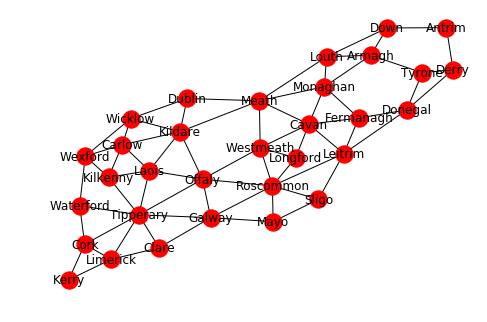

In [6]:
##Question 4 The counties of Ireland

I = nx.Graph()

c = ["Antrim", "Armagh", "Carlow", "Cavan", "Clare", "Cork", "Derry", "Donegal", "Down",
           "Dublin","Fermanagh", "Galway", "Kerry", "Kildare", "Kilkenny", "Laois", "Leitrim",
           "Limerick", "Longford", "Louth", "Mayo", "Meath", "Monaghan", "Offaly", "Roscommon",
           "Sligo", "Tipperary", "Tyrone", "Waterford", "Westmeath", "Wexford", "Wicklow"]
I.add_nodes_from(c)



I.add_edges_from([("Cork","Kerry"), ("Cork","Limerick"), ("Cork","Waterford"), ("Cork","Tipperary"), ("Kerry","Limerick"),
                 ("Limerick","Clare"), ("Clare","Galway"), ("Limerick","Clare"), ("Galway","Mayo"), ("Galway","Roscommon"),
                  ("Galway","Offaly"), ("Galway","Tipperary"), ("Mayo","Sligo"), ("Mayo","Roscommon"), ("Roscommon","Leitrim"),
                  ("Roscommon","Longford"), ("Roscommon","Westmeath"), ("Roscommon","Offaly"), ("Roscommon", "Sligo"), 
                  ("Leitrim", "Cavan"), ("Leitrim","Donegal"), ("Leitrim","Fermanagh"), ("Donegal","Tyrone"),("Derry","Donegal"),
                  ("Derry", "Tyrone"), ("Derry", "Antrim"), ("Down", "Antrim"), ("Down","Armagh"), ("Armagh","Tyrone"),("Monaghan","Armagh"),
                  ("Monaghan","Cavan"), ("Monaghan","Louth"), ("Monaghan", "Fermanagh"), ("Fermanagh","Cavan"), ("Monaghan", "Meath"),
                  ("Cavan", "Longford"), ("Cavan", "Westmeath"), ("Westmeath","Meath"), ("Westmeath","Offaly"), ("Armagh","Louth"),
                  ("Louth", "Down"), ("Dublin","Meath"), ("Dublin","Kildare"), ("Dublin","Wicklow"), ("Meath","Kildare"), ("Kildare","Laois"),
                  ("Kildare","Offaly"), ("Kildare","Carlow"), ("Kildare","Wicklow"), ("Wicklow", "Carlow"), ("Carlow","Laois"), ("Carlow","Wexford"),
                  ("Carlow", "Kilkenny"), ("Kilkenny","Wexford"), ("Waterford","Wexford"), ("Tipperary","Waterford"), ("Tipperary","Kilkenny"),
                  ("Tipperary","Offaly"), ("Tipperary", "Laois"), ("Offaly","Kildare"), ("Meath","Cavan"), ("Clare","Tipperary"),
                  ("Sligo","Leitrim"),("Longford","Westmeath"), ("Limerick", "Tipperary"), ("Clare","Tipperary"), ("Wicklow","Wexford"),
                  ("Kilkenny","Laois"),("Laois","Offaly"), ("Westmeath","Meath"), ("Meath","Louth"), ("Donegal","Fermanagh")
     
                 ])


print("The order of the Irish County graph is ",I.order(),"\n")
print("The size of the Irish County graph is ",I.size(),"\n")





#Dergree centrality 
dc = nx.degree_centrality(I)
ec = nx.eigenvector_centrality(I)
cc = nx.closeness_centrality(I)
bc = nx.betweenness_centrality(I)

print("The 3 most central counties in terms of degree centrailty are\n")
print(collections.Counter(dc).most_common(3),"\n")

print("The 3 most central counties in terms of eigenvector centrailty are\n")
print(collections.Counter(ec).most_common(3),"\n")


print("The 3 most central counties in terms of closeness centrailty are\n")
print(collections.Counter(cc).most_common(3),"\n")


print("The 3 most central counties in terms of betweenness centrailty are\n")
print(collections.Counter(bc).most_common(3),"\n")




nx.draw(I, with_labels=True)